In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19,VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout, Conv2D


2024-02-27 04:27:18.973082: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-27 04:27:18.973207: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-27 04:27:19.258617: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
data_path_train = "/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/train"
data_path_val = "/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val"

In [ ]:
img_size = (256, 256)
batch_size = 32

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
val_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    data_path_train,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
)
validation_generator = val_datagen.flow_from_directory(
    data_path_val,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 6054 images belonging to 5 classes.
Found 2016 images belonging to 5 classes.


In [ ]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : Bacterial Pneumonia
1 : Corona Virus Disease
2 : Normal
3 : Tuberculosis
4 : Viral Pneumonia


In [ ]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Create a new model on top of the VGG16 base
model = Sequential()
model.add(Conv2D(3,(3,3), input_shape=(256,256,1),activation='relu',padding='same'))
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(train_generator.num_classes, activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import RMSprop, Adam
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(train_generator,epochs=20,validation_data=validation_generator)

Epoch 1/20


I0000 00:00:1709008155.248618     119 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


190/190 [==============================] - 270s 1s/step - loss: 0.7635 - accuracy: 0.7065 - val_loss: 2.2284 - val_accuracy: 0.5000
Epoch 2/20
190/190 [==============================] - 177s 930ms/step - loss: 0.5583 - accuracy: 0.7724 - val_loss: 1.9154 - val_accuracy: 0.5456
Epoch 3/20
190/190 [==============================] - 175s 923ms/step - loss: 0.5143 - accuracy: 0.7940 - val_loss: 1.0020 - val_accuracy: 0.6255
Epoch 4/20
190/190 [==============================] - 175s 919ms/step - loss: 0.4943 - accuracy: 0.7988 - val_loss: 0.9325 - val_accuracy: 0.6855
Epoch 5/20
190/190 [==============================] - 173s 910ms/step - loss: 0.4704 - accuracy: 0.8079 - val_loss: 1.2431 - val_accuracy: 0.5223
Epoch 6/20
190/190 [==============================] - 171s 901ms/step - loss: 0.4623 - accuracy: 0.8129 - val_loss: 0.6422 - val_accuracy: 0.7545
Epoch 7/20
190/190 [==============================] - 171s 898ms/step - loss: 0.4271 - accuracy: 0.8233 - val_loss: 0.7489 - val_accuracy:

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
data_path_test="/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/test"
test_generator = test_datagen.flow_from_directory(
    data_path_test,
    target_size=img_size,
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical'
)

# Evaluate the model on the test set
results = model.evaluate(test_generator)

# Print the evaluation results
print("Test Loss:", results[0])
print("Test Accuracy:", results[1])

Found 2025 images belonging to 5 classes.
64/64 [==============================] - 22s 343ms/step - loss: 0.8388 - accuracy: 0.7442
Test Loss: 0.8388031721115112
Test Accuracy: 0.7441975474357605


In [ ]:
history=model.fit(train_generator,epochs=2,validation_data=validation_generator)

Epoch 1/2
190/190 [==============================] - 180s 944ms/step - loss: 0.3244 - accuracy: 0.8710 - val_loss: 0.5269 - val_accuracy: 0.7693
Epoch 2/2
190/190 [==============================] - 185s 975ms/step - loss: 0.3275 - accuracy: 0.8654 - val_loss: 0.4989 - val_accuracy: 0.8070


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
data_path_test="/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/test"
test_generator = test_datagen.flow_from_directory(
    data_path_test,
    target_size=img_size,
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical'
)

# Evaluate the model on the test set
results = model.evaluate(test_generator)

# Print the evaluation results
print("Test Loss:", results[0])
print("Test Accuracy:", results[1])

Found 2025 images belonging to 5 classes.
64/64 [==============================] - 23s 360ms/step - loss: 0.6348 - accuracy: 0.7763
Test Loss: 0.6348048448562622
Test Accuracy: 0.7762963175773621


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes
print(classification_report(y_true, y_pred, target_names=labels.values()))

64/64 [==============================] - 23s 355ms/step
                      precision    recall  f1-score   support

 Bacterial Pneumonia       0.83      0.36      0.50       403
Corona Virus Disease       0.98      0.84      0.90       407
              Normal       0.70      0.99      0.82       404
        Tuberculosis       0.97      0.96      0.96       408
     Viral Pneumonia       0.57      0.73      0.64       403

            accuracy                           0.78      2025
           macro avg       0.81      0.78      0.76      2025
        weighted avg       0.81      0.78      0.77      2025



64/64 [==============================] - 22s 352ms/step


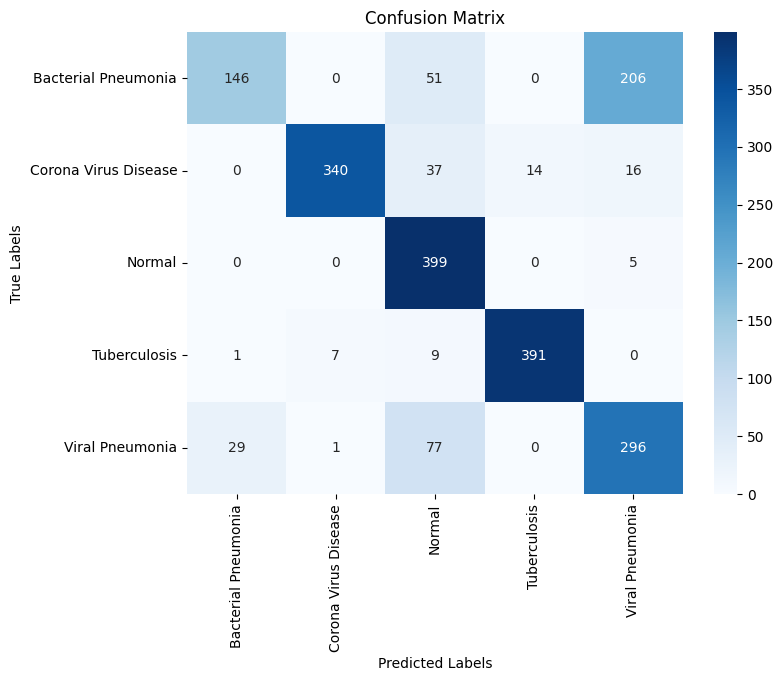

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Get the true labels
true_labels = test_generator.classes

# Predict the labels using the model
predictions = model.predict(test_generator)

# Get the predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.save("multiclass_vgg19.h5")

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
